In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("gaiaDataNearSun.csv")

In [4]:
df = df.loc[df.parallax > 0, :]

In [5]:
df

,parallax,l,b
8,4.361050,102.540726,22.150772
14,3.848747,101.339751,25.568407
18,4.481269,105.135384,14.431055
19,5.357165,333.502588,-14.510419
21,3.647845,102.827615,26.384531
...,...,...,...
36067,4.756752,75.390124,-13.023934
36081,4.607256,25.727542,-25.716642
36104,6.602261,174.419140,3.087128
36213,6.324645,357.625335,-3.458766


In [6]:
df['distance'] = 1.0/df.parallax

In [7]:
df

,parallax,l,b,distance
8,4.361050,102.540726,22.150772,0.229303
14,3.848747,101.339751,25.568407,0.259825
18,4.481269,105.135384,14.431055,0.223151
19,5.357165,333.502588,-14.510419,0.186666
21,3.647845,102.827615,26.384531,0.274134
...,...,...,...,...
36067,4.756752,75.390124,-13.023934,0.210227
36081,4.607256,25.727542,-25.716642,0.217049
36104,6.602261,174.419140,3.087128,0.151463
36213,6.324645,357.625335,-3.458766,0.158112


In [8]:
df.columns

Index(['parallax', 'l', 'b', 'distance'], dtype='object')

In [9]:
df['distance'] = 1.0 / (df['parallax'] / 1000.0)

# Convert heliocentric longitude and latitude to radians
df['l_rad'] = np.radians(df['l'])
df['b_rad'] = np.radians(df['b'])

# Set the Galactic center longitude (you may adjust this as needed)
galactic_center_longitude_rad = np.radians(0.0)

# Calculate azimuthal angle (Phi) in radians
df['phi'] = df['l_rad'] - galactic_center_longitude_rad

# Calculate X, Y, and Z based on distance, longitude, and latitude
df['X'] = df['distance'] * np.cos(df['b_rad']) * np.cos(df['l_rad'] - galactic_center_longitude_rad)
df['Y'] = df['distance'] * np.cos(df['b_rad']) * np.sin(df['l_rad'] - galactic_center_longitude_rad)
df['Z'] = df['distance'] * np.sin(df['b_rad'])

# Calculate R (distance from Galactic center) from X and Y
df['R'] = np.sqrt(df['X']**2 + df['Y']**2)


In [10]:
df.columns

Index(['parallax', 'l', 'b', 'distance', 'l_rad', 'b_rad', 'phi', 'X', 'Y',
       'Z', 'R'],
      dtype='object')

In [11]:
df

,parallax,l,b,distance,l_rad,b_rad,phi,X,Y,Z,R
8,4.361050,102.540726,22.150772,229.302596,1.789673,0.386604,1.789673,-46.114573,207.311938,86.457431,212.378891
14,3.848747,101.339751,25.568407,259.824802,1.768712,0.446253,1.768712,-46.085369,229.804865,112.137374,234.380326
18,4.481269,105.135384,14.431055,223.151062,1.834959,0.251869,1.834959,-56.426537,208.613725,55.612555,216.110250
19,5.357165,333.502588,-14.510419,186.665879,5.820718,-0.253255,5.820718,161.728688,-80.625829,-46.770264,180.711629
21,3.647845,102.827615,26.384531,274.134435,1.794680,0.460497,1.794680,-54.522927,239.449306,121.823515,245.578337
...,...,...,...,...,...,...,...,...,...,...,...
36067,4.756752,75.390124,-13.023934,210.227492,1.315806,-0.227311,1.315806,51.662908,198.196906,-47.376459,204.819602
36081,4.607256,25.727542,-25.716642,217.048943,0.449030,-0.448840,0.449030,176.165249,84.886930,-94.182047,195.550468
36104,6.602261,174.419140,3.087128,151.463259,3.044188,0.053881,3.044188,-150.526552,14.708492,8.156974,151.243454
36213,6.324645,357.625335,-3.458766,158.111637,6.241740,-0.060367,6.241740,157.688102,-6.539243,-9.538905,157.823633


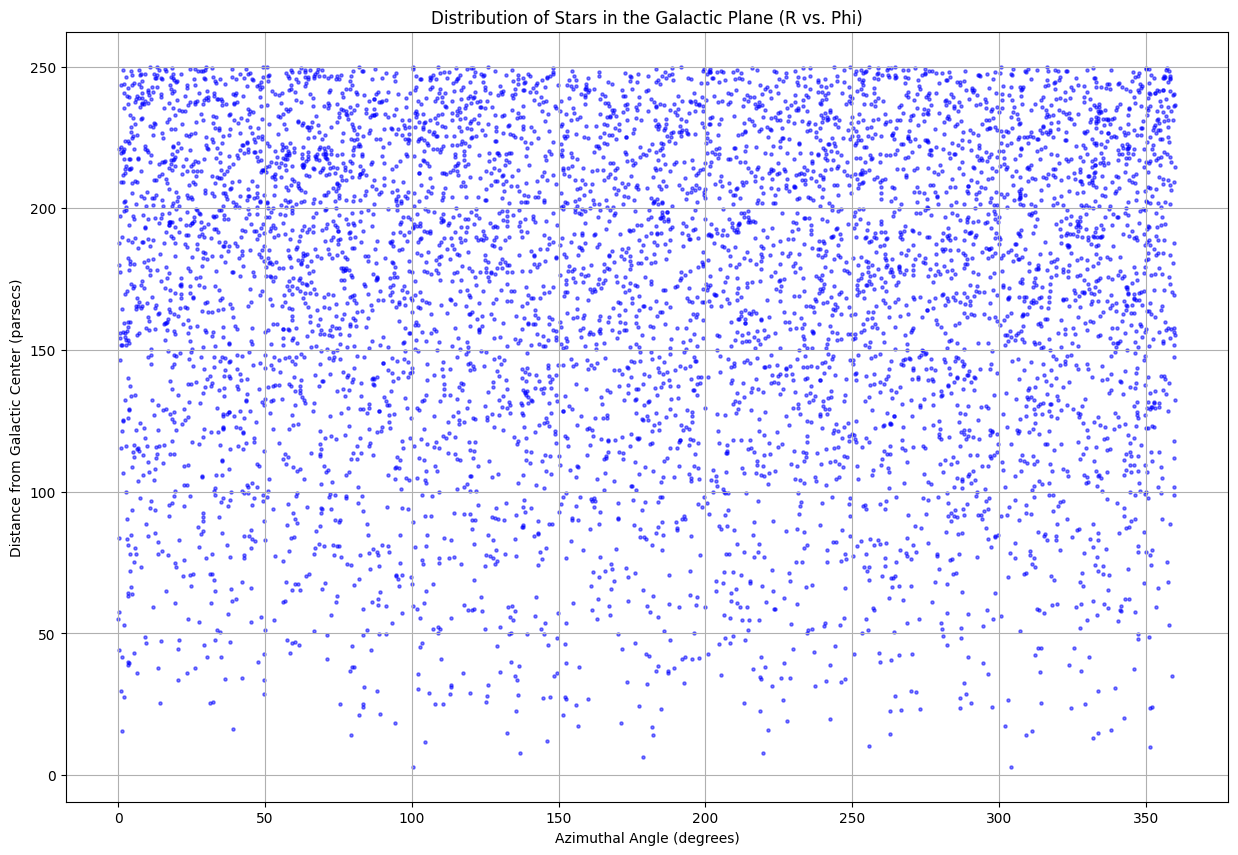

In [12]:
R_data = df['R']
Phi_data = np.degrees(df['phi'])  # Convert radians to degrees

# Create a 2D scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(Phi_data, R_data, s=5, c='b', alpha=0.5)
plt.xlabel('Azimuthal Angle (degrees)')
plt.ylabel('Distance from Galactic Center (parsecs)')
plt.title('Distribution of Stars in the Galactic Plane (R vs. Phi)')
plt.grid(True)
plt.show()

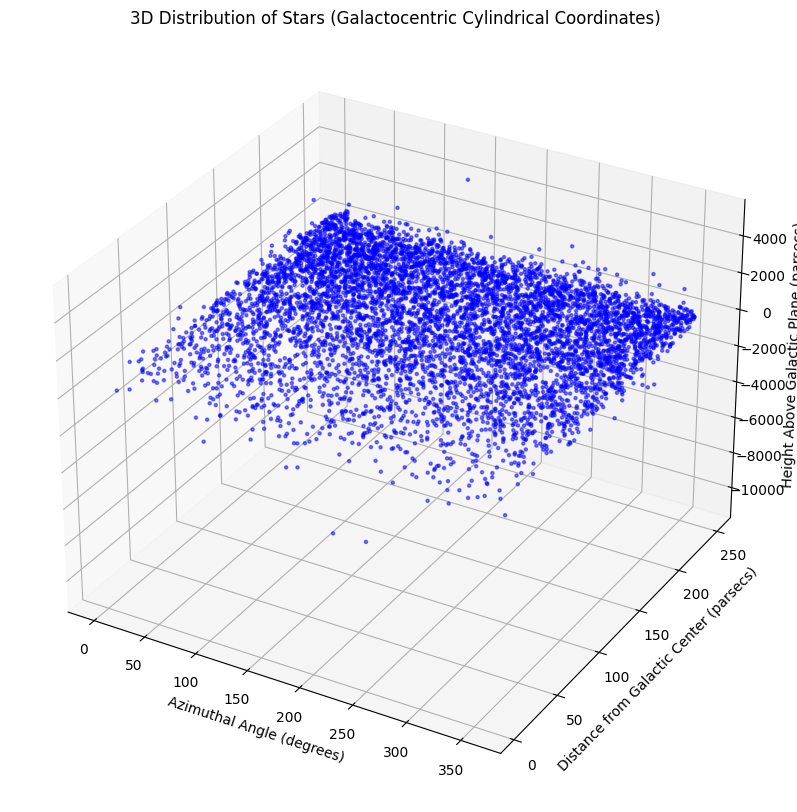

In [13]:
R_data = df['R']
Phi_data = np.degrees(df['phi'])  # Convert radians to degrees
Z_data = df['Z']

# Create a 3D scatter plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Phi_data, R_data, Z_data, s=5, c='b', marker='o', alpha=0.5)
ax.set_xlabel('Azimuthal Angle (degrees)')
ax.set_ylabel('Distance from Galactic Center (parsecs)')
ax.set_zlabel('Height Above Galactic Plane (parsecs)')
ax.set_title('3D Distribution of Stars (Galactocentric Cylindrical Coordinates)')
plt.show()

In [14]:
df

,parallax,l,b,distance,l_rad,b_rad,phi,X,Y,Z,R
8,4.361050,102.540726,22.150772,229.302596,1.789673,0.386604,1.789673,-46.114573,207.311938,86.457431,212.378891
14,3.848747,101.339751,25.568407,259.824802,1.768712,0.446253,1.768712,-46.085369,229.804865,112.137374,234.380326
18,4.481269,105.135384,14.431055,223.151062,1.834959,0.251869,1.834959,-56.426537,208.613725,55.612555,216.110250
19,5.357165,333.502588,-14.510419,186.665879,5.820718,-0.253255,5.820718,161.728688,-80.625829,-46.770264,180.711629
21,3.647845,102.827615,26.384531,274.134435,1.794680,0.460497,1.794680,-54.522927,239.449306,121.823515,245.578337
...,...,...,...,...,...,...,...,...,...,...,...
36067,4.756752,75.390124,-13.023934,210.227492,1.315806,-0.227311,1.315806,51.662908,198.196906,-47.376459,204.819602
36081,4.607256,25.727542,-25.716642,217.048943,0.449030,-0.448840,0.449030,176.165249,84.886930,-94.182047,195.550468
36104,6.602261,174.419140,3.087128,151.463259,3.044188,0.053881,3.044188,-150.526552,14.708492,8.156974,151.243454
36213,6.324645,357.625335,-3.458766,158.111637,6.241740,-0.060367,6.241740,157.688102,-6.539243,-9.538905,157.823633


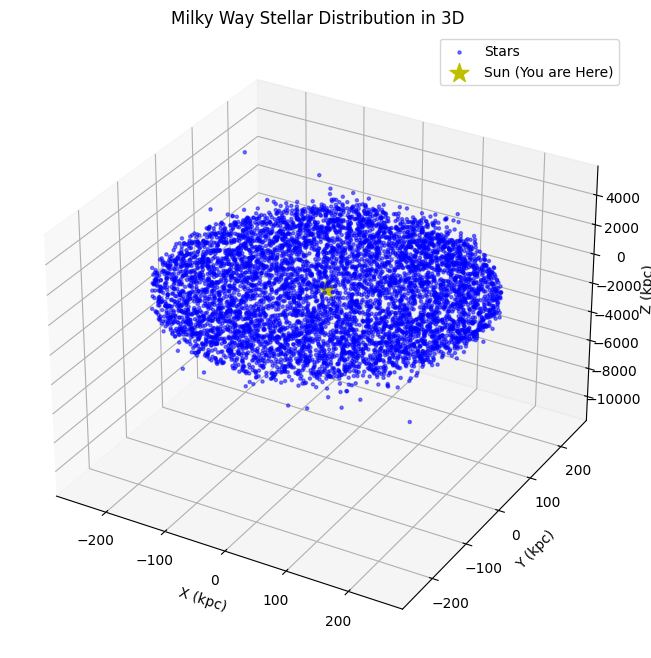

In [15]:
from mpl_toolkits.mplot3d import Axes3D



# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the stars' Galactocentric coordinates
ax.scatter(df['X'], df['Y'], df['Z'], c='b', s=5, alpha=0.5, label='Stars')

# Add the positions of the Sun and Earth
ax.scatter(0, 0, 0, c='y', marker='*', s=200, label='Sun (You are Here)')  # The Sun at the Galactic center
 

ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')
ax.set_title('Milky Way Stellar Distribution in 3D')
ax.legend()

plt.show()

In [16]:
df

,parallax,l,b,distance,l_rad,b_rad,phi,X,Y,Z,R
8,4.361050,102.540726,22.150772,229.302596,1.789673,0.386604,1.789673,-46.114573,207.311938,86.457431,212.378891
14,3.848747,101.339751,25.568407,259.824802,1.768712,0.446253,1.768712,-46.085369,229.804865,112.137374,234.380326
18,4.481269,105.135384,14.431055,223.151062,1.834959,0.251869,1.834959,-56.426537,208.613725,55.612555,216.110250
19,5.357165,333.502588,-14.510419,186.665879,5.820718,-0.253255,5.820718,161.728688,-80.625829,-46.770264,180.711629
21,3.647845,102.827615,26.384531,274.134435,1.794680,0.460497,1.794680,-54.522927,239.449306,121.823515,245.578337
...,...,...,...,...,...,...,...,...,...,...,...
36067,4.756752,75.390124,-13.023934,210.227492,1.315806,-0.227311,1.315806,51.662908,198.196906,-47.376459,204.819602
36081,4.607256,25.727542,-25.716642,217.048943,0.449030,-0.448840,0.449030,176.165249,84.886930,-94.182047,195.550468
36104,6.602261,174.419140,3.087128,151.463259,3.044188,0.053881,3.044188,-150.526552,14.708492,8.156974,151.243454
36213,6.324645,357.625335,-3.458766,158.111637,6.241740,-0.060367,6.241740,157.688102,-6.539243,-9.538905,157.823633


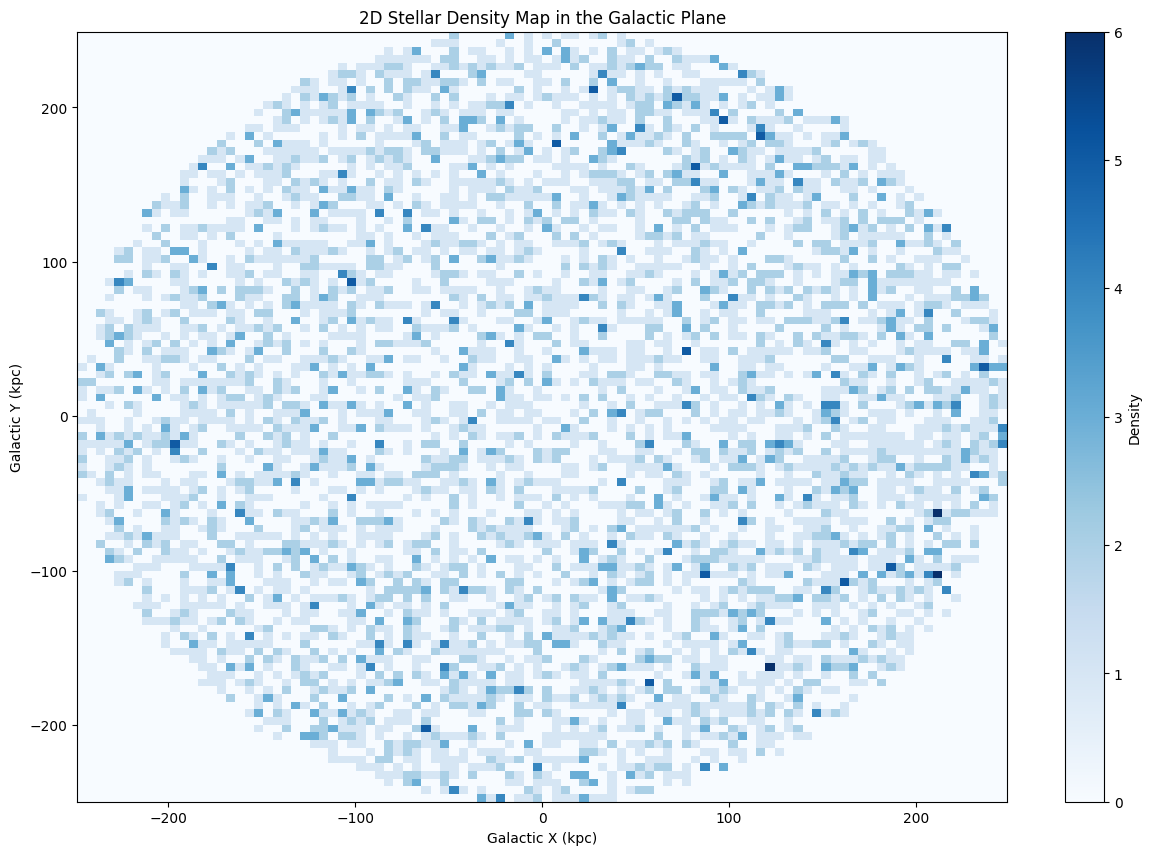

In [17]:

galactic_X = df['X']
galactic_Y = df['Y']

# Create a 2D density map using plt.hist2d()
plt.figure(figsize=(15, 10))
plt.hist2d(galactic_X, galactic_Y, bins=(100, 100), cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('Galactic X (kpc)')
plt.ylabel('Galactic Y (kpc)')
plt.title('2D Stellar Density Map in the Galactic Plane')
plt.show()

# What these columns represent 

- parallax: Parallax measurements provide information about the distance to stars. You can use this column to:


- l (longitude): Heliocentric longitude provides the angular position of stars within the Milky Way. You can use this column to:

- b (latitude): Heliocentric latitude represents the angle above or below the Galactic plane. You can use this column to:

- distance: The calculated distance to stars based on parallax measurements. You can use this column to:


- l_rad: Heliocentric longitude converted to radians. This column simplifies trigonometric calculations and is useful for creating visualizations based on angular positions.

- b_rad: Heliocentric latitude converted to radians. Similar to l_rad, this column simplifies trigonometric calculations.

- phi: Azimuthal angle calculated relative to the Galactic center. You can use this column to:

- Z: Height above the Galactic plane. This column provides information about stars' positions above or below the Galactic mid-plane.

- X, Y, R: These columns represent the Galactocentric rectangular coordinates (X, Y, Z) and cylindrical coordinates (R, Phi, Z) of stars. You can use these columns to:

